In [1]:
from tdc.single_pred import ADME
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
from noiseestimator import NoiseEstimator

In [2]:
# Taken from https://doi.org/10.1016/j.ejpb.2016.12.027, Table 3

ref_values = [[11.32, 54.3, 150, 35.7, 28.2, 12],
[0.25, 0.31, 0.14, 1.3, 0.12, 1.29, 0.086],
[0.37, 0.42, 0.92, 1.5, 0.51, 1.81, 0.75],
[10.53, 24.36, 93, 34.7, 18.49, 20],
[8.19, 31.77, 140, 33.2, 23.7, 17.74, 2.3],
[12.71, 53.07, 33.8, 39.5, 31.07, 28],
[11.28, 47.2, 110, 39.4, 41.9, 21.29, 3.3],
[0.37, 0.67, 2.1, 0.49, 2.51, 0.47],
[0.27, 1.71, 0.41, 0.8, 0.38, 2.38],
[9.67, 44.67, 45.7, 22.68, 2.4]]

In [3]:
from itertools import combinations
import math

std = 0
n = 0

for r in ref_values:
    # get all pairs of r
    for a, b in combinations(r, 2):
        std += (math.log10(a * 1e-6) - math.log10(b * 1e-6))**2
        n += 1

std = math.sqrt(std / (2*(n-1)))
print(std)
print(n)

0.4212356106344209
169


In [4]:
data = ADME(name = 'Caco2_Wang')
data.get_data()

Found local copy...
Loading...
Done!


,Drug_ID,Drug,Y
0,(-)-epicatechin,Oc1cc(O)c2c(c1)OC(c1ccc(O)c(O)c1)C(O)C2,-6.220000
1,"(2E,4Z,8Z)-N-isobutyldodeca-2,4,10-triene-8 -y...",C/C=C\C#CCC/C=C\C=C\C(=O)NCC(C)C,-3.860000
2,codeine,COc1ccc2c3c1O[C@H]1[C@@H](O)C=C[C@H]4[C@@H](C2...,-4.090000
3,creatinine,CN1CC(=O)NC1=N,-5.935409
4,danazol,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,-4.840000
...,...,...,...
905,Capric acid (decanoic acid),CCCCCCCCCC(=O)O,-4.680000
906,Apometzgerin (2),COc1cc(-c2cc(=O)c3c(O)cc(O)cc3o2)cc(O)c1OC,-4.950000
907,3,COC(=O)C[C@@H](C(=O)NN(Cc1ccc(/C=C\c2ccccc2)cc...,-5.080000
908,51d,COc1ccc2c(O[C@@H]3C[C@H]4C(=O)N[C@]5(C(=O)NS(=...,-5.300000


In [5]:
data_range = data.y.max() - data.y.min()
print(data_range)

4.250000200000001


In [6]:
data.y.to_csv('../data/processed/caco2.csv', index=False)

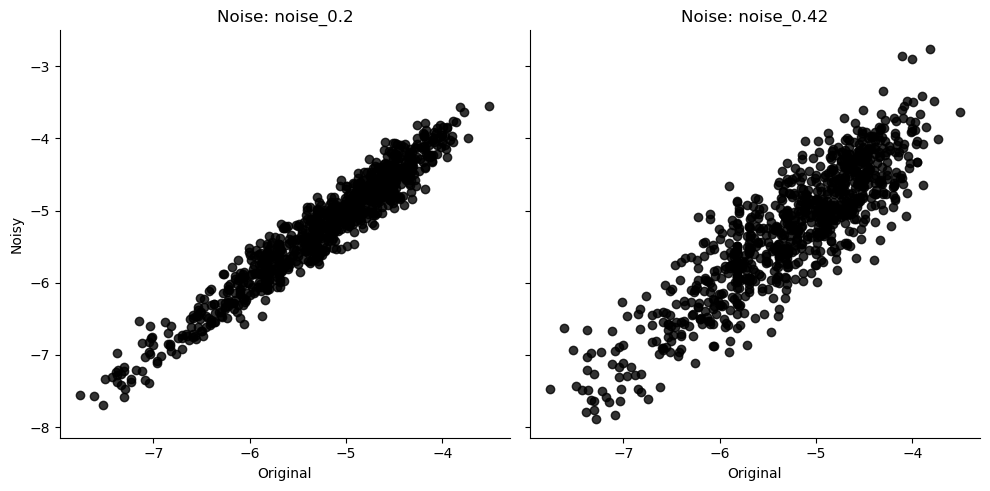

In [7]:
NE = NoiseEstimator(data.y, [0.2, 0.42])
NE.plot()

<Axes: title={'center': 'mae for different noise levels'}, xlabel='Noise level', ylabel='mae'>

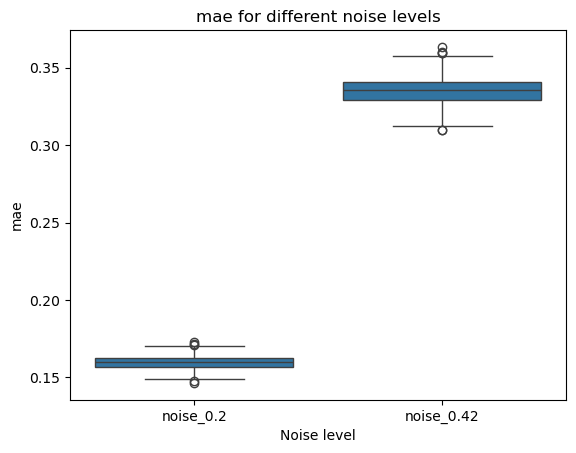

In [8]:
NE.plot_bootstrap(metric='mae')

In [9]:
NE.noise_bootstraps.groupby('noise').mean()

,mae,mse,rmse,r2,pearsonr
noise,,,,,
noise_0.2,0.159642,0.040061,0.200101,0.933611,0.968440
noise_0.42,0.335229,0.176329,0.419800,0.707790,0.879625


<Axes: title={'center': 'mae for different noise levels'}, xlabel='Noise level', ylabel='mae'>

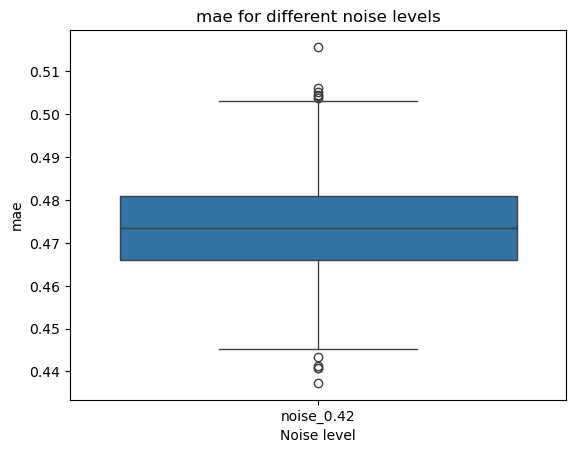

In [10]:
NE = NoiseEstimator(data.y, 0.42, 0.42)
NE.plot_bootstrap(metric='mae')

In [11]:
NE.noise_bootstraps.groupby('noise').mean()

,mae,mse,rmse,r2,pearsonr
noise,,,,,
noise_0.42,0.473462,0.352042,0.593174,0.548072,0.774486


In [12]:
NE.noise_bootstraps.mae.to_csv('../data/interim/Caco2_mae.csv')